# finding:


Temperature Vs. Latitude: there is negative correlations  between latitude and temperature as we go to north.
with over 73% of variation in the given dataset.
Temperature Vs. Latitude: there is correlation between latitude and temperature as we go to south
with over 44% of variation in the dataset
Humidity vs. Latitude: very week correlation as we go north between latitude and humidity. With the 0.6% of variation.

Humidity vs. Latitude:very week correlation as we go south between latitude and humidity. With the 1.9% of variation.

In [110]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy


In [4]:
# generate the Cities list by using the citipy library

In [7]:
# Create a set of random lat and lng combinations
#count=0
lat_lngs = []
cities = []
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)

lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
     # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    

In [9]:
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


In [11]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                           "Lat": city_lat,
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | sungai penuh
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | wilton
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | bikenibeu village
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | levuka
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | beeskow
Processing Record 17 of Set 1 | san juan del sur
Processing Record 18 of Set 1 | kulhudhuffushi
Processing Record 19 of Set 1 | meridian
Processing Record 20 of Set 1 | la'ie
Processing Record 21 of Set 1 | maragogi
Processing Record 22 of Set 1 | adamstown
Processing R

In [13]:
city_data_df=pd.DataFrame(city_data)


In [15]:
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.44,76,100,0.98,TF,1729388137
1,sungai penuh,-2.0833,101.3833,24.09,63,35,1.71,ID,1729387889
2,punta arenas,-53.1500,-70.9167,8.06,66,100,6.17,CL,1729388139
3,grytviken,-54.2811,-36.5092,-3.62,73,13,2.18,GS,1729388140
4,badger,64.8000,-147.5333,-8.07,82,100,2.57,US,1729388142


In [19]:
#Export the city into a csv.
city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

In [21]:
city_data_df=pd.read_csv("output_data/cities.csv",index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.44,76,100,0.98,TF,1729388137
1,sungai penuh,-2.0833,101.3833,24.09,63,35,1.71,ID,1729387889
2,punta arenas,-53.1500,-70.9167,8.06,66,100,6.17,CL,1729388139
3,grytviken,-54.2811,-36.5092,-3.62,73,13,2.18,GS,1729388140
4,badger,64.8000,-147.5333,-8.07,82,100,2.57,US,1729388142


# Creating the Scatter plots
# Latitude Vs.Temperature

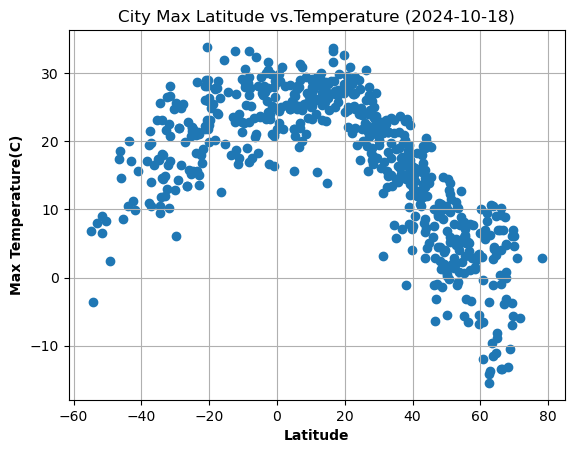

In [34]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs.Temperature (2024-10-18)")
plt.ylabel("Max Temperature(C)",fontweight="bold")
plt.xlabel("Latitude",fontweight="bold")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs.Humidity

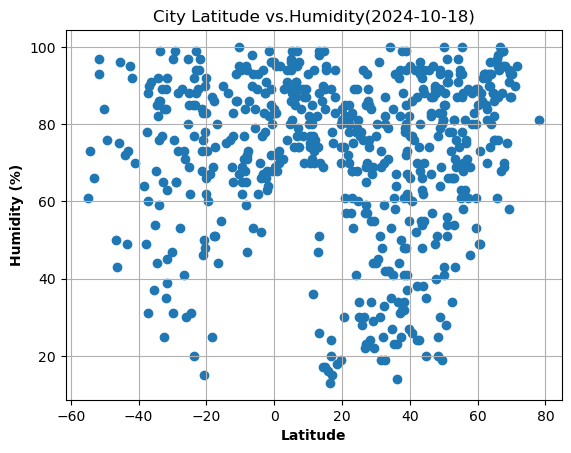

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])             
# Incorporate the other graph properties
plt.title("City Latitude vs.Humidity(2024-10-18)")
plt.ylabel("Humidity (%)",fontweight="bold")           
plt.xlabel("Latitude",fontweight="bold")
plt.grid()
# Save the figure
plt.savefig("output_data/fig2.png")           
# Show plot
plt.show()

# Latitude Vs.Cloudiness

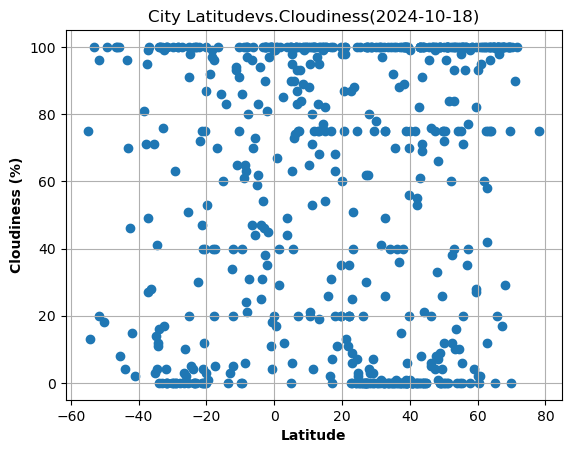

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitudevs.Cloudiness(2024-10-18)")
plt.ylabel("Cloudiness (%)",fontweight="bold")
plt.xlabel("Latitude",fontweight="bold")
plt.grid()
# Save the figure
plt.savefig("output_data/fig3.png")
 # show plot
plt.show()           

# latitude Vs. Wind speed Plot

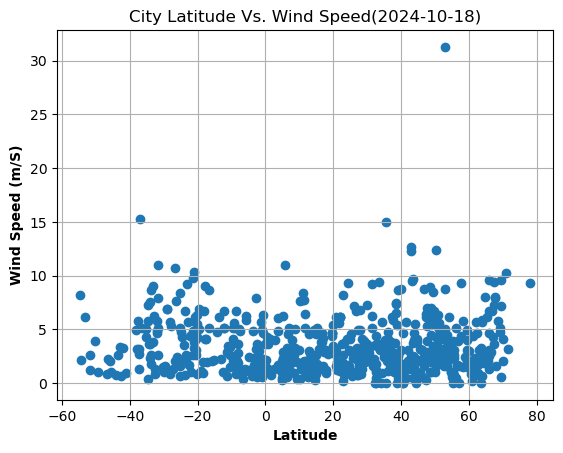

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(2024-10-18)")
plt.ylabel("Wind Speed (m/S)",fontweight="bold")
plt.xlabel("Latitude",fontweight="bold")
plt.grid()
# Save the figure
plt.savefig("output_data/fig4.png")
#show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,badger,64.8000,-147.5333,-8.07,82,100,2.57,US,1729388142
5,iqaluit,63.7506,-68.5145,-1.15,74,75,0.00,CA,1729388143
6,wilton,38.4119,-121.2722,23.21,32,0,2.57,US,1729388144
7,aasiaat,68.7098,-52.8699,-10.55,75,100,5.74,GL,1729388145
8,bikenibeu village,1.3673,173.1241,30.98,70,40,4.12,KI,1729388147


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.44,76,100,0.98,TF,1729388137
1,sungai penuh,-2.0833,101.3833,24.09,63,35,1.71,ID,1729387889
2,punta arenas,-53.1500,-70.9167,8.06,66,100,6.17,CL,1729388139
3,grytviken,-54.2811,-36.5092,-3.62,73,13,2.18,GS,1729388140
9,blackmans bay,-43.0167,147.3167,17.07,73,70,3.39,AU,1729388148


# Temperature Vs.Latitude linear Regression plot

In [54]:
# Linear regression on Northern Hemisphere

(slope_north,intercept_north,rvalue_north,pvalue,stderr) =linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


In [56]:
#north_temp=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
r_squared= rvalue_north**2
#y=mx+b
r_squared
north_regress_value=slope_north*northern_hemi_df["Lat"]+intercept_north

north_line_eq ='Y = ' + str(round(slope_north,2))+ 'x +'+str(round(intercept_north,2))


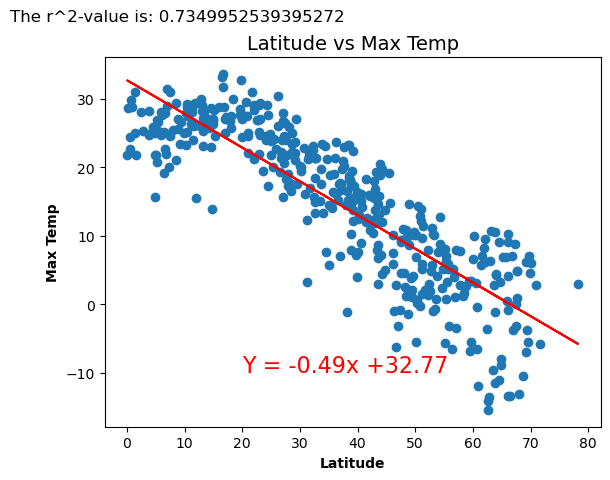

In [118]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],north_regress_value,color="r")
plt.title("Latitude vs Max Temp",fontsize=14,loc="center")
plt.suptitle(f'The r^2-value is: {r_squared}',ha='right',fontsize=12)
plt.ylabel("Max Temp",fontweight="bold")
plt.xlabel("Latitude",fontweight="bold")
plt.annotate(north_line_eq,(20,-10),color="r",fontsize=16)
plt.show()


In [60]:
# Linear regression on Southern Hemisphere
(slope_south,intercept_south,rvalue_south,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


In [62]:
regress_value_south=slope_south*southern_hemi_df["Lat"]+intercept_south

In [64]:
south_line_eq= ' y = ' + str(round(slope_south,2))+'x+'+str(round(intercept_south,2))

In [66]:
sout_r_squared= (rvalue_south)**2

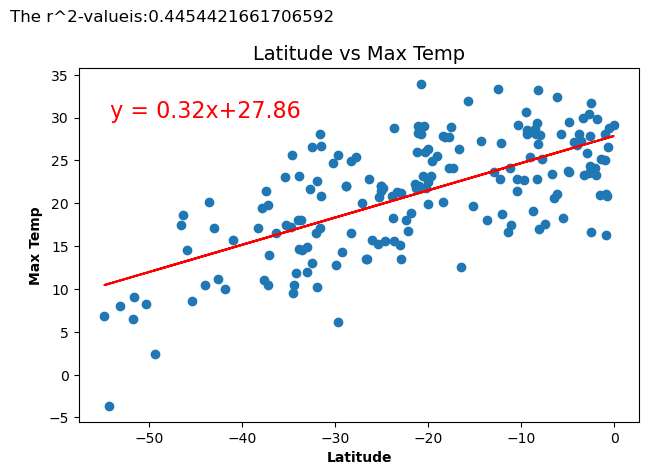

In [120]:

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_value_south,color='r')
plt.annotate(south_line_eq,(-55,30),color='r',fontsize=16)
plt.title("Latitude vs Max Temp",fontsize=14,loc="center")
plt.ylabel("Max Temp",fontweight="bold")
plt.xlabel("Latitude",fontweight="bold")
plt.suptitle(f'The r^2-valueis:{sout_r_squared}',ha="right",fontsize=12)
plt.tight_layout()
plt.show()

# Humidity vs. Latitude

 # Northern Hemisphere

In [72]:
 #Northern Hemisphere
(slope_humid,intercept_humid,rvalue_humid,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])


In [74]:
north_humidity_regress=slope_humid*northern_hemi_df["Lat"]+intercept_humid

In [76]:
north_humidity_line_equ = 'Y = ' + str(round(slope_humid,2)) + 'x+' + str(round(intercept_humid,2))

In [78]:
north_humidity_r2=rvalue_humid**2

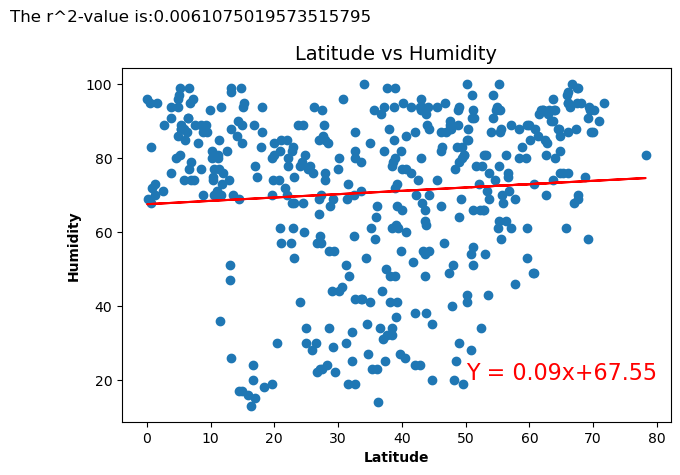

In [80]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],north_humidity_regress,color='r')
plt.annotate(north_humidity_line_equ,(50,20),color='r',fontsize=16)
plt.title("Latitude vs Humidity",fontsize=14,loc="center")
plt.suptitle(f'The r^2-value is:{north_humidity_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight="bold")
plt.ylabel("Humidity",fontweight="bold")
plt.tight_layout()
plt.show()

# Southern Hemisphere


In [83]:
(slope_humid_south,intercept_humid_south,rvalue_humid_south,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])


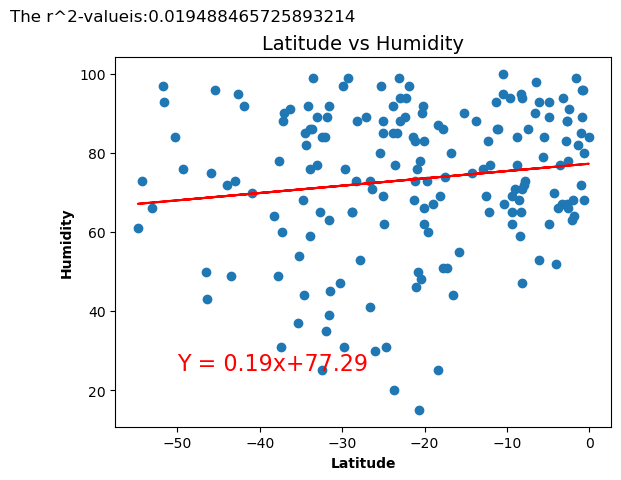

In [85]:
south_humidity_regress=slope_humid_south*southern_hemi_df["Lat"]+intercept_humid_south
south_humidity_line_equ = 'Y = ' + str(round(slope_humid_south,2)) + 'x+' + str(round(intercept_humid_south,2))
south_humidity_r2=rvalue_humid_south**2

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],south_humidity_regress,color='r')
plt.annotate(south_humidity_line_equ,(-50,25),color='r',fontsize=16)
plt.title("Latitude vs Humidity",fontsize=14,loc="center")
plt.suptitle(f'The r^2-valueis:{south_humidity_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight="bold")
plt.ylabel("Humidity",fontweight="bold")

plt.show()

# Cloudiness vs. Latitude

# Northern Hemisphere

In [89]:
# Northern Hemisphere
(slope_cloud,intercept_cloud,rvalue_cloud,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])


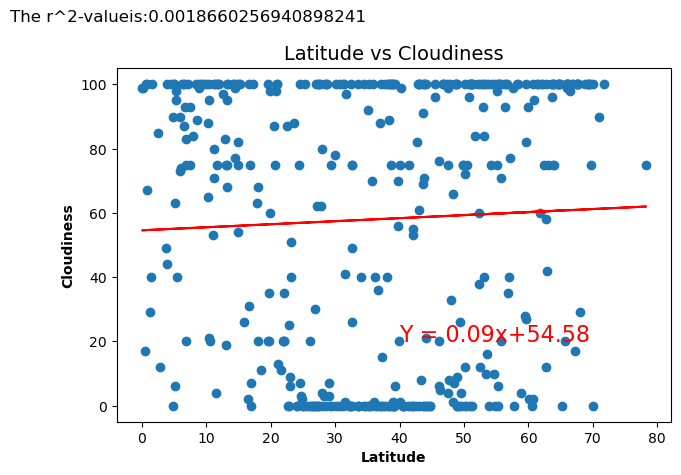

In [91]:
north_Cloudiness_regress=slope_cloud*northern_hemi_df["Lat"]+intercept_cloud
north_Cloudiness_line_equ = 'Y = ' + str(round(slope_cloud,2)) + 'x+' + str(round(intercept_cloud,2))
north_Cloudiness_r2=rvalue_cloud**2

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],north_Cloudiness_regress,color='r')
plt.annotate(north_Cloudiness_line_equ,(40,20),color='r',fontsize=16)
plt.title("Latitude vs Cloudiness",fontsize=14,loc="center")
plt.suptitle(f'The r^2-valueis:{north_Cloudiness_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight='bold')
plt.ylabel("Cloudiness",fontweight='bold')
plt.tight_layout()
plt.show()

# Southern Hemisphere

In [94]:
 #Southern Hemisphere
(slope_cloud_south,intercept_cloud_south,rvalue_cloud_south,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

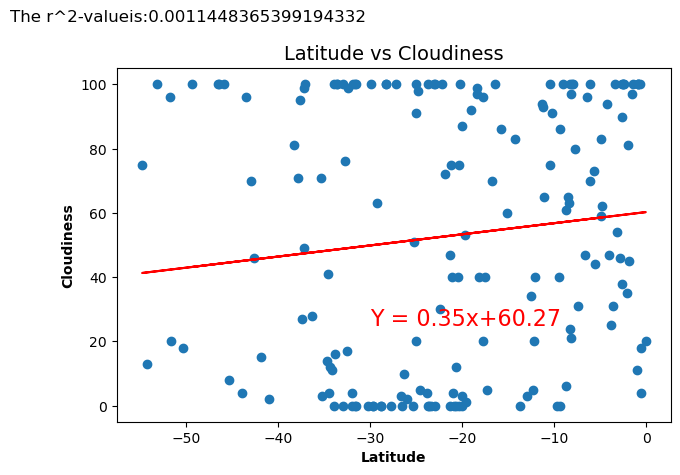

In [96]:
south_Cloudiness_regress=slope_cloud_south*southern_hemi_df["Lat"]+intercept_cloud_south
south_Cloudiness_line_equ = 'Y = ' + str(round(slope_cloud_south,2)) + 'x+' + str(round(intercept_cloud_south,2))
south_Cloudiness_r2=(0.033835433201297026)**2

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],south_Cloudiness_regress,color='r')
plt.annotate(south_Cloudiness_line_equ,(-30,25),color='r',fontsize=16)
plt.title("Latitude vs Cloudiness",fontsize=14,loc="center")
plt.suptitle(f'The r^2-valueis:{south_Cloudiness_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight='bold')
plt.ylabel("Cloudiness",fontweight='bold')
plt.tight_layout()
plt.show()

# Wind Speed vs.Latitude linear Regression plot

# Northern Hemisphere

In [100]:
# Northern Hemisphere
(slope_wind,intercept_wind,rvalue_wind,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])


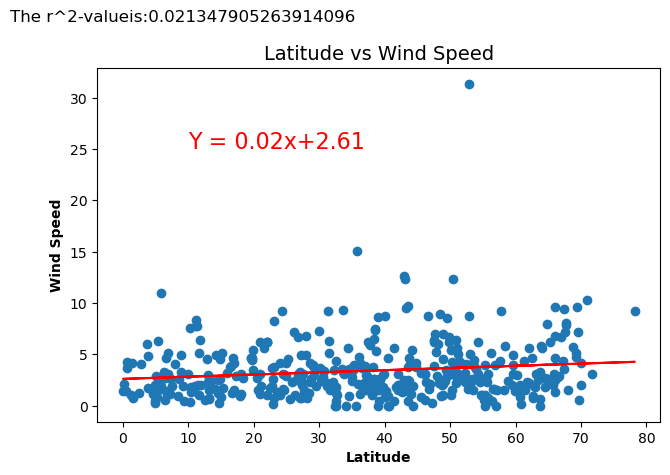

In [102]:
north_wind_regress=slope_wind*northern_hemi_df["Lat"]+intercept_wind
north_wind_line_equ = 'Y = ' + str(round(slope_wind,2)) + 'x+' + str(round(intercept_wind,2))
north_wind_r2=rvalue_wind**2

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],north_wind_regress,color='r')
plt.annotate(north_wind_line_equ,(10,25),color='r',fontsize=16)
plt.title("Latitude vs Wind Speed",fontsize=14,loc="center")
plt.suptitle(f'The r^2-valueis:{north_wind_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight='bold')
plt.ylabel("Wind Speed",fontweight='bold')
plt.tight_layout()
plt.show()

# Southern Hemisphere

In [105]:
(slope_wind_south,intercept_wind_south,rvalue_wind_south,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

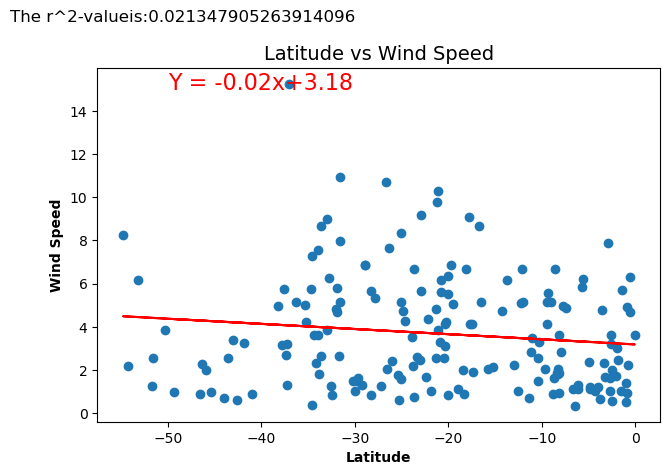

In [107]:

south_wind_regress=slope_wind_south*southern_hemi_df["Lat"]+intercept_wind_south
south_wind_line_equ = 'Y = ' + str(round(slope_wind_south,2)) + 'x+' + str(round(intercept_wind_south,2))
south_wind_r2=rvalue_wind**2

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],south_wind_regress,color='r')
plt.annotate(south_wind_line_equ,(-50,15),color='r',fontsize=16)
plt.title("Latitude vs Wind Speed",fontsize=14,loc="center")
plt.suptitle(f'The r^2-valueis:{south_wind_r2}',ha="right",fontsize=12)
plt.xlabel("Latitude",fontweight='bold')
plt.ylabel("Wind Speed",fontweight='bold')
plt.tight_layout()
plt.show()